<a href="https://colab.research.google.com/github/sydoky/ToyotaCorollaPricePrediction/blob/main/ToyotaCorollaRegressionProblem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ToyotaCorollaPricePrediction. Regression problem

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor


from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder




In [2]:
toyota = pd.read_csv("/content/ToyotaCorolla.csv")

In [3]:
toyota

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23,46986,Diesel,90,1,0,2000,3,1165
1,13750,23,72937,Diesel,90,1,0,2000,3,1165
2,13950,24,41711,Diesel,90,1,0,2000,3,1165
3,14950,26,48000,Diesel,90,0,0,2000,3,1165
4,13750,30,38500,Diesel,90,0,0,2000,3,1170
...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,1,0,1300,3,1025
1432,10845,72,19000,Petrol,86,0,0,1300,3,1015
1433,8500,71,17016,Petrol,86,0,0,1300,3,1015
1434,7250,70,16916,Petrol,86,1,0,1300,3,1015


In [4]:
toyota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age        1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   FuelType   1436 non-null   object
 4   HP         1436 non-null   int64 
 5   MetColor   1436 non-null   int64 
 6   Automatic  1436 non-null   int64 
 7   CC         1436 non-null   int64 
 8   Doors      1436 non-null   int64 
 9   Weight     1436 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 112.3+ KB


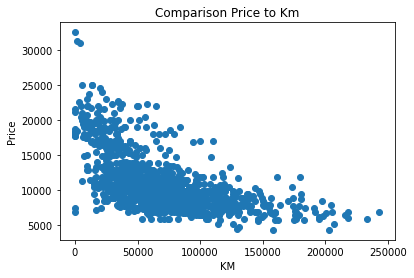

In [5]:
fig,ax=plt.subplots()
ax.scatter(toyota["KM"], toyota["Price"])

ax.set(title="Comparison Price to Km", xlabel="KM", ylabel="Price"); 

In [6]:
misha=pd.crosstab(toyota.Price, toyota.KM)

In [7]:
misha

KM,1,15,225,450,1500,2000,3000,4000,5000,5278,5309,5459,6000,6155,6250,6500,7000,7187,7650,8537,8574,9750,9788,10000,10077,10210,10841,11000,11090,11500,11754,11999,12000,12500,13000,13157,13178,13253,13634,13747,...,156204,158320,158492,159908,159968,160000,161000,161775,164000,170000,172980,174000,174139,174833,176000,176177,176184,178800,178858,179860,180378,180638,183277,183500,190900,191620,194545,194765,197501,198167,200732,203254,204250,205000,207114,216000,217764,218118,232940,243000
Price,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4350,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4400,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4450,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4750,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5150,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24950,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
24990,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
31000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
misha2=toyota.groupby(toyota.KM).mean()

#group by will help to combine common values into groups, whcih helps to analize the data

In [9]:
misha2

,Price,Age,HP,MetColor,Automatic,CC,Doors,Weight
KM,,,,,,,,
1,17116.25,19.625,105.25,0.75,0.0,1650.0,4.25,1159.25
15,21500.00,2.000,110.00,1.00,0.0,1600.0,5.00,1130.00
225,21125.00,2.000,97.00,1.00,0.0,1400.0,5.00,1110.00
450,18700.00,7.000,97.00,1.00,0.0,1400.0,5.00,1110.00
1500,31275.00,4.000,116.00,1.00,0.0,2000.0,5.00,1480.00
...,...,...,...,...,...,...,...,...
216000,6500.00,53.000,69.00,0.00,0.0,1900.0,3.00,1110.00
217764,6000.00,78.000,72.00,1.00,0.0,2000.0,5.00,1135.00
218118,6950.00,79.000,72.00,0.00,0.0,2000.0,5.00,1150.00


In [10]:
misha3=misha2.iloc[:,:1]

#here we select only specific columns. See below the result


In [11]:
misha3

,Price
KM,
1,17116.25
15,21500.00
225,21125.00
450,18700.00
1500,31275.00
...,...
216000,6500.00
217764,6000.00
218118,6950.00


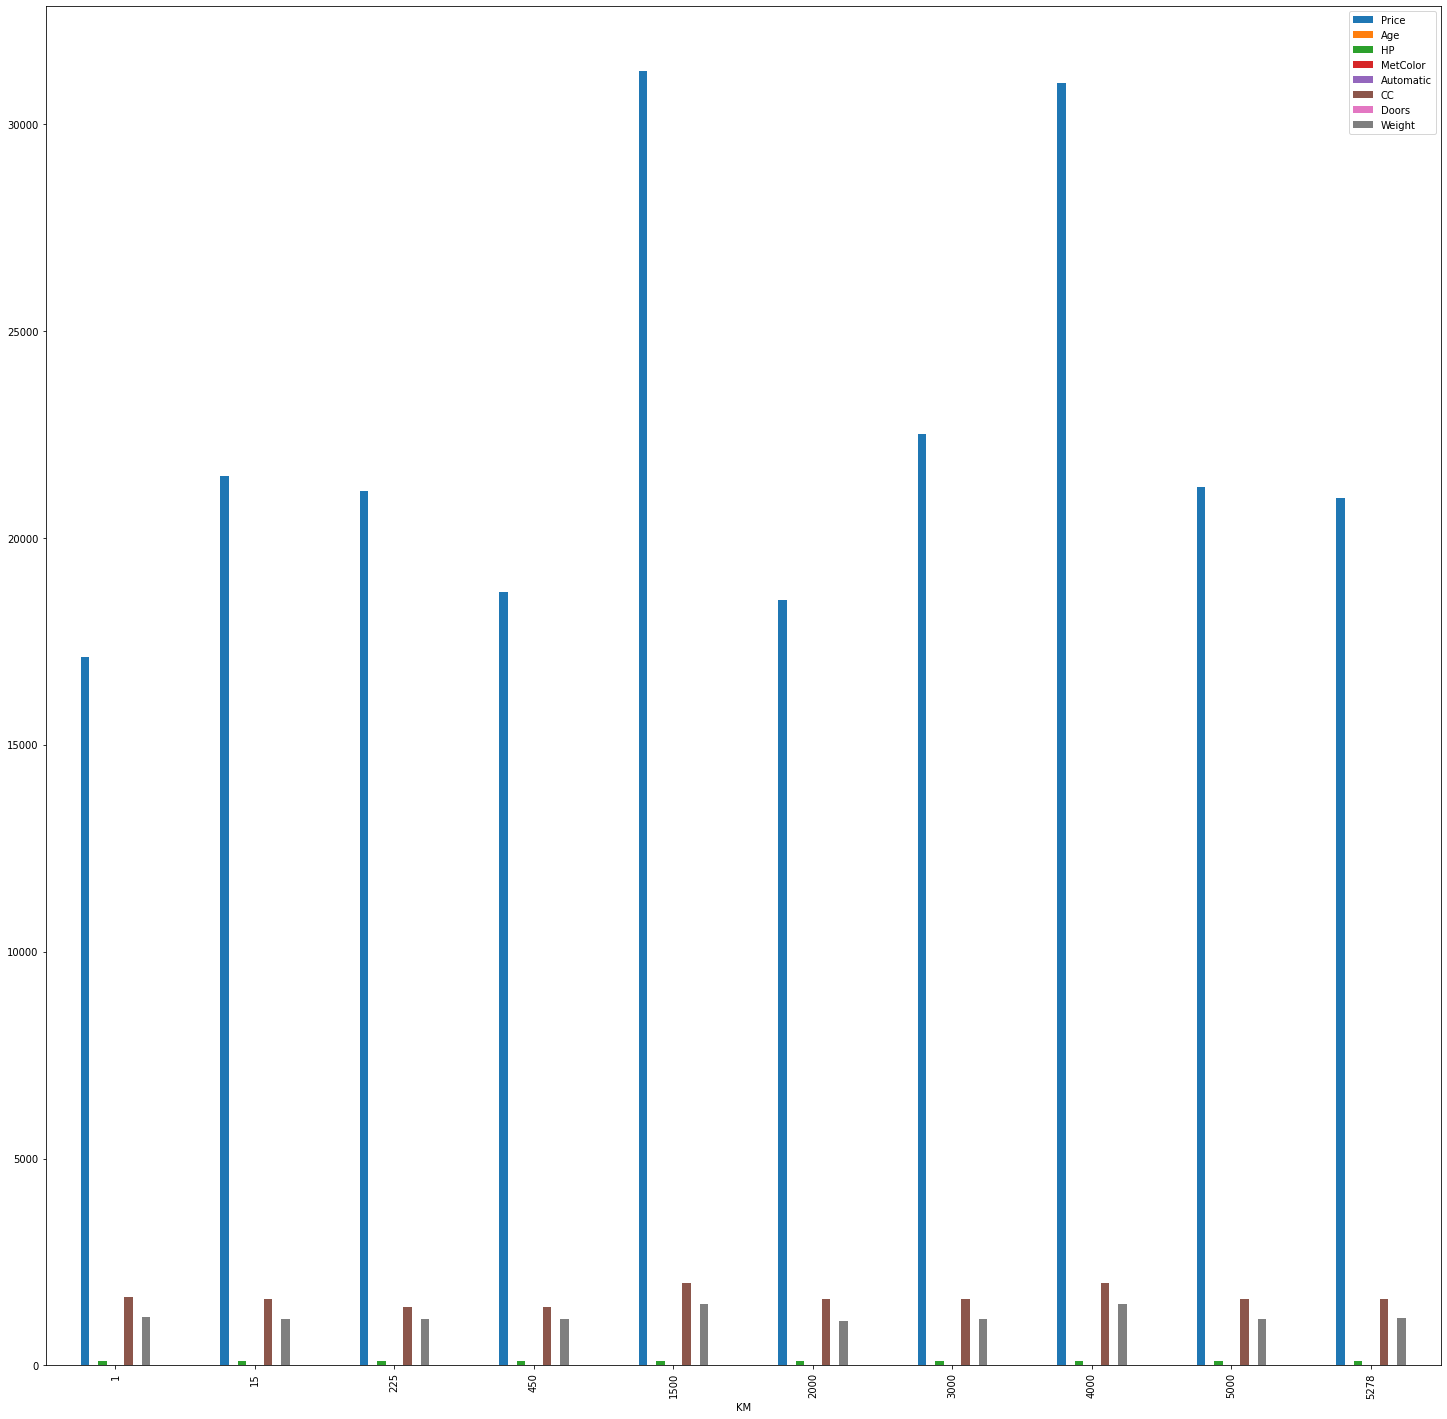

In [12]:
misha2[:10].plot.bar(figsize=(25,25))\
#we are selecting up to 10 rows, 

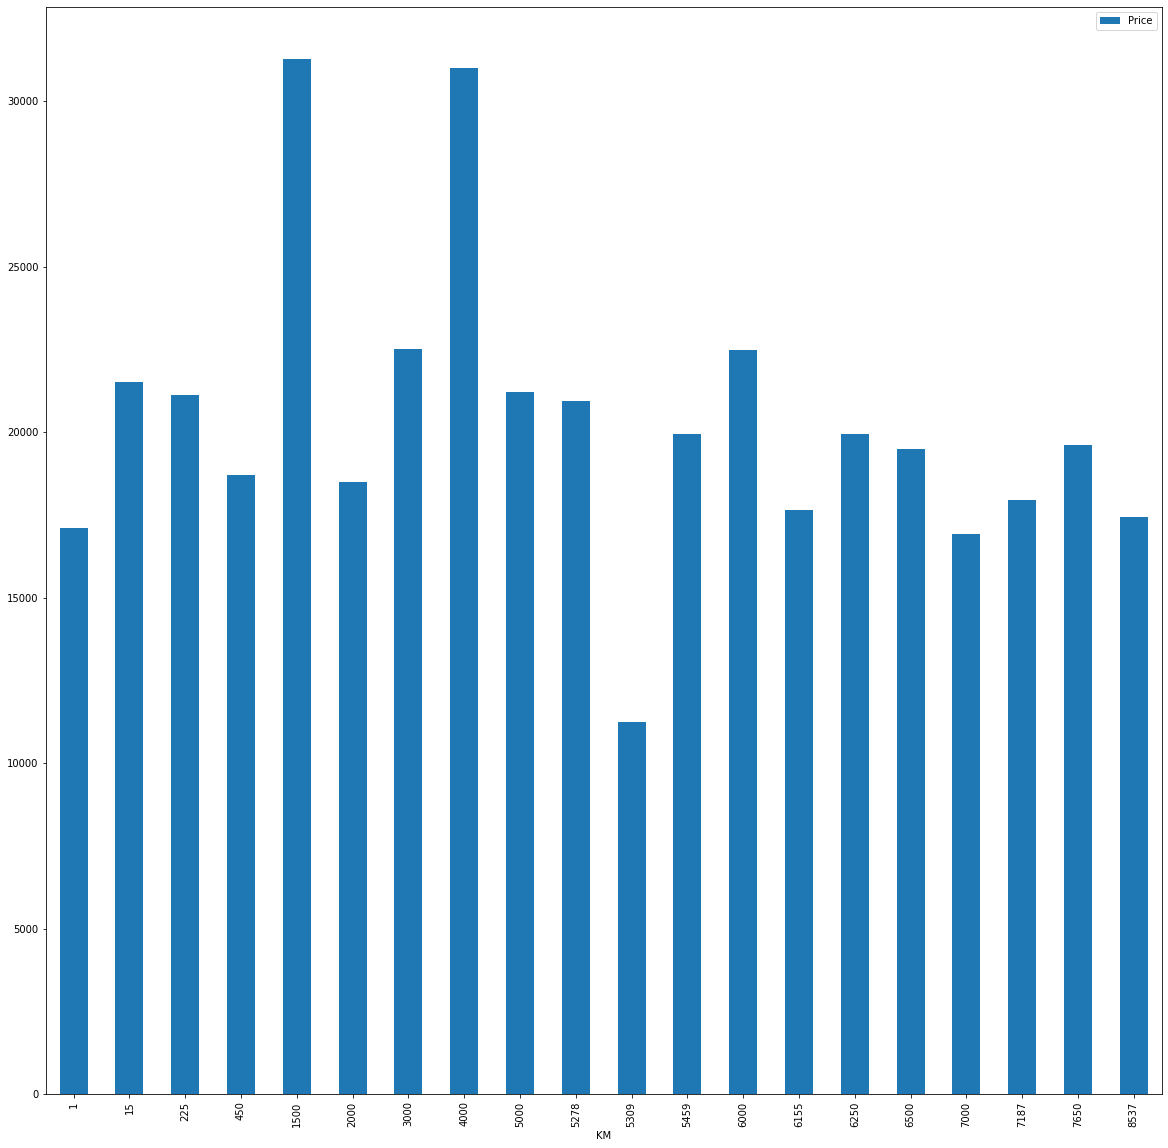

In [13]:
misha3[:20].plot.bar(figsize=(20,20))

In [36]:
#I stopped this cell because it's taking a long time to run

misha.plot(kind="bar", figsize=(20, 20), color=["red", "black"])

KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7f6a263ac320> (for post_execute):


KeyboardInterrupt: ignored

In [14]:
toyota.isna().sum()

Price        0
Age          0
KM           0
FuelType     0
HP           0
MetColor     0
Automatic    0
CC           0
Doors        0
Weight       0
dtype: int64

In [15]:
X=toyota.drop("Price",axis=1) #X is taking features columns 
y=toyota["Price"]

In [16]:
X

,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,23,46986,Diesel,90,1,0,2000,3,1165
1,23,72937,Diesel,90,1,0,2000,3,1165
2,24,41711,Diesel,90,1,0,2000,3,1165
3,26,48000,Diesel,90,0,0,2000,3,1165
4,30,38500,Diesel,90,0,0,2000,3,1170
...,...,...,...,...,...,...,...,...,...
1431,69,20544,Petrol,86,1,0,1300,3,1025
1432,72,19000,Petrol,86,0,0,1300,3,1015
1433,71,17016,Petrol,86,0,0,1300,3,1015
1434,70,16916,Petrol,86,1,0,1300,3,1015


In [17]:
y

0       13500
1       13750
2       13950
3       14950
4       13750
        ...  
1431     7500
1432    10845
1433     8500
1434     7250
1435     6950
Name: Price, Length: 1436, dtype: int64

In [18]:
#string issue 
for label, content in toyota.items():
  if pd.api.types.is_string_dtype(content):
    print(label)

FuelType


In [19]:
#converting strings into numbers
for label, content in toyota.items():
  if not pd.api.types.is_numeric_dtype(content):
    toyota[label] = pd.Categorical(content).codes+1

In [20]:
X=toyota.drop("Price",axis=1) #X is taking features columns 
y=toyota["Price"]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) 

In [22]:
len(X), len(X_train)  

(1436, 1148)

In [23]:
#Ridge, SVR, RandomForestRegressor

regression_models = {"Ridge":Ridge(),
                     "SVR_linear": SVR(kernel="linear"),
                     "SVR_rbf": SVR(kernel="rbf"),
                     "RandomForestREgressor": RandomForestRegressor()}

regression_scores = {}

In [24]:
def fit_and_score(regression_models, X_train, X_test, y_train, y_test):
  np.random.seed(42)
  model_scores={}

  for model_name, model in regression_models.items():
    model.fit(X_train, y_train)

    model_scores[model_name] = model.score(X_test, y_test)

  return model_scores

In [ ]:
model_results = fit_and_score(regression_models = regression_models,
                              X_train = X_train,
                              X_test = X_test,
                              y_train = y_train,
                              y_test = y_test)

model_results

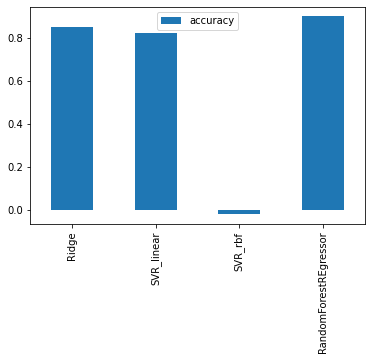

In [27]:
model_compare = pd.DataFrame(model_results, index=["accuracy"])
model_compare.T.plot.bar();

# Building an evaluation function

In [28]:
regression_models

{'RandomForestREgressor': RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False),
 'Ridge': Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
       normalize=False, random_state=None, solver='auto', tol=0.001),
 'SVR_linear': SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
     kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
 'SVR_rbf': SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
     kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=F

In [29]:
def rmsle(y_test, y_preds):
  return np.sqrt(mean_squared_error(y_test, y_preds))

def show_scores(y_test,y_preds):
  scores={"R^2":r2_score(y_test, y_preds),
          "MAE":mean_absolute_error(y_test, y_preds),
          "MSE":mean_squared_error(y_test,y_preds)}
  return scores

In [30]:
# print("Regressor Metrics ON Test.....")
# print("R^2 is {}%".format(r2_score(y_test,y_preds)*100))
# print("MAE is {}".format(mean_absolute_error(y_test, y_preds)))
# print("MSE is {}".format(mean_squared_error(y_test, y_preds)))

#this cell became useless

# Hyperparameter tuning and cross validation 

In [31]:
#Finding the best parameters. We have to do that because we can find the best accuracy even though Random Forest looks the best one and Radom Forest is only 86%, which is not enough.
#We can do tune 2 ways 
#1 Tuning thru Randomized Search Cv
#2 Tuning thru Grid Search Tv

In [ ]:
#to find out y_preds


# RandomizedSearchCv

In [ ]:
rand_search_grid = {"n_estimators": np.arange(10, 100, 10),
                    "max_depth":[None, 3, 5, 10],
                    "max_features": [0.5, 1 , "auto", "sqrt"],
                    "min_samples_split": np.arange(2, 20, 2),
                    "min_samples_leaf": np.arange(1,20,2),
                    "max_samples":[1000]}
rand_search_model = RandomizedSearchCV(RandomForestRegressor(),
                                       param_distributions=rand_search_grid,
                                       n_iter=20,
                                       cv=5,
                                       verbose=True)
rand_search_model.fit(X_train, y_train)

In [33]:
rand_search_model.best_params_

{'max_depth': 5,
 'max_features': 0.5,
 'max_samples': 1000,
 'min_samples_leaf': 9,
 'min_samples_split': 16,
 'n_estimators': 70}

In [34]:
y_preds = rand_search_model.predict(X_test)

In [ ]:
y_preds

In [36]:
rand_search_model.score(X_test,y_test)

0.8642290941513658

In [37]:
show_scores(y_test,y_preds)

{'MAE': 963.6708693300845,
 'MSE': 1838939.7644699255,
 'R^2': 0.8642290941513658}

# GridSearchCV to find out the best parameter

In [38]:
# grid2={"n-estimators":[1200, 1500, 2000],
#        "max_depth": [None, 5, 10],
#        "max_features":["auto", "sqrt"],
#        "min_samples_leaf": [1,2],
#        "min_samples_split":[4,6]}

#wrong cell 

In [40]:
grid2 = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}

In [41]:
#I stopped running this cell because it's taking long time to complete the work
np.random.seed(42)

reg = RandomForestRegressor(n_jobs=1)

grid_search_reg = GridSearchCV(estimator=reg,
                               param_grid=grid2,
                               cv=5,
                               verbose=2)

grid_search_reg.fit(X_train, y_train)

Fitting 5 folds for each of 540 candidates, totalling 2700 fits
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10, total=   0.0s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10, total=   0.0s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10, total=   0.0s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10, total=   0.0s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimator

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10, total=   0.0s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.4s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.4s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.4s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.4s
[CV] max_depth=None, max_features=a

KeyboardInterrupt: ignored

# Next step is to train our model with the best parameters

In [43]:
#I am building my model based on on cells 32-33, taking best results from cell 33
ideal_model = RandomForestRegressor(n_estimators=70,
                                  max_depth= 5,
                                  min_samples_leaf=9,
                                  min_samples_split=16,
                                  n_jobs=1,
                                  max_samples=1000)

ideal_model.fit(X_train, y_train)

# 'max_depth': 5,
#  'max_features': 0.5,
#  'max_samples': 1000,
#  'min_samples_leaf': 9,
#  'min_samples_split': 16,
#  'n_estimators': 70



RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=1000, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=9,
                      min_samples_split=16, min_weight_fraction_leaf=0.0,
                      n_estimators=70, n_jobs=1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [45]:
ideal_model.score(X_test,y_test)

0.8632598024362035

In [46]:
show_scores(y_test,y_preds)

{'MAE': 963.6708693300845,
 'MSE': 1838939.7644699255,
 'R^2': 0.8642290941513658}

# Faster model

In [50]:
%%time
fast_model=RandomForestRegressor(n_estimators=40,
                                 min_samples_leaf=3,
                                 max_features=0.5,
                                 n_jobs=1)
fast_model.fit(X_train,y_train)

CPU times: user 93.9 ms, sys: 1 ms, total: 94.9 ms
Wall time: 97.4 ms


In [51]:
fast_model.score(X_test, y_test)

0.8915917055309325

# Now I need to save our model we created. We can do it in 2 ways. Check SciKitLearn project

In [47]:
from joblib import dump, load
dump(ideal_model, filename="ideal_model.joblib")

['ideal_model.joblib']

In [48]:
loaded_joblib_model=load(filename="ideal_model.joblib")

In [49]:
loaded_joblib_model.score(X_test, y_test)

0.8632598024362035

# Feature importance

In [52]:
ideal_model.feature_importances_

array([9.26777872e-01, 1.81713614e-02, 6.12348641e-04, 1.23019720e-02,
       8.15413650e-04, 0.00000000e+00, 3.26634885e-03, 5.25141038e-04,
       3.75295422e-02])

In [55]:
import seaborn as sns

def plot_features(columns,importances,n=200):
  df=(pd.DataFrame({"features":columns,
                    "feature_importance":importances})
     .sort_values("feature_importance",ascending=False)
     .reset_index(drop=True))


  sns.barplot(x="feature_importance",
             y="features",
             data=df[:n],
             orient="h")



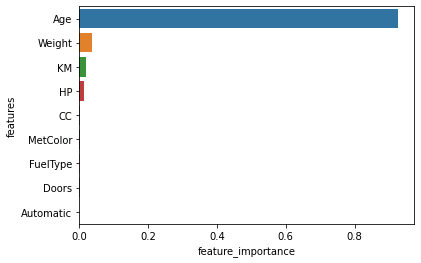

In [56]:
plot_features(X_train.columns,ideal_model.feature_importances_)

# feature_importance tells me what is the most important that affects the price